In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import time

Preparing data

In [3]:
df = pd.read_csv('my_data/train.csv')

In [4]:
other_df = df[['Survived', 'Sex', 'Age', 'Pclass']]
other_df = other_df.dropna()
other_df.Sex.replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)

In [5]:
X = other_df.drop('Survived', axis=1)
y = other_df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

------------------

Simple random forest

In [7]:
clf_simple = RandomForestClassifier(n_estimators=10)
clf_simple.fit(X_train, y_train)
print('Train score:', clf_simple.score(X_train, y_train))
print('Test score:', clf_simple.score(X_test, y_test))

Train score: 0.7610190522968746
Test score: 0.7521972908696102


In [8]:
clf_simple.feature_importances_

array([0.69118857, 0.08132109, 0.22749034])

In [9]:
predicted = clf_simple.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.7044905842588122
Recall: 0.7133602249113801


-------------------

Small random forest

In [10]:
clf_small = RandomForestClassifier(n_estimators=2)
clf_small.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [11]:
print('Train score:', clf_small.score(X_train, y_train))
print('Test score:', clf_small.score(X_test, y_test))

Train score: 0.8650065361168994
Test score: 0.6645268171464072


In [12]:
clf_small.feature_importances_

array([0.24257761, 0.08403629, 0.6733861 ])

In [13]:
predicted = clf_small.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.4908547519426181
Recall: 0.6489647542279121


-------------------

Dependency on n_estimators

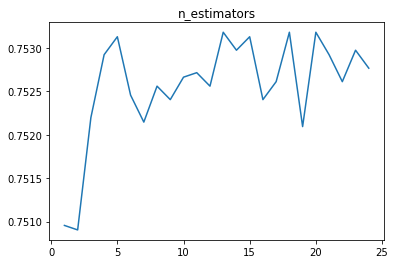

In [11]:
acc = []
values = range(1, 25)
for n_estimators in values:
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('n_estimators')
plt.show()

------------------

Dependency on min_samples_split parameter

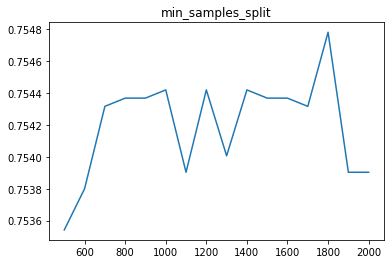

In [14]:
acc = []
values = range(500, 2001, 100)
for min_samples_split in values:
    clf = RandomForestClassifier(n_estimators=10, min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_split')
plt.show()

-----------------------

Dependency on min_samples_leaf parameter

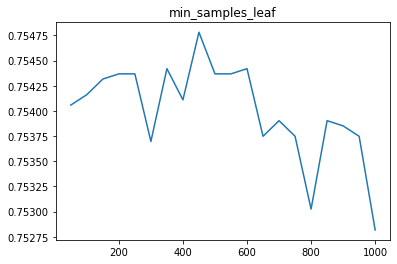

In [13]:
acc = []
values = range(50, 1001, 50)
for min_samples_leaf in values:
    clf = RandomForestClassifier(n_estimators=10, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_leaf')
plt.show()

-----------------------

In [15]:
clf_best = GridSearchCV(RandomForestClassifier(n_estimators=5), {
    'min_samples_split': range(800, 1800, 50),
    'min_samples_leaf': range(200, 700, 50),
})

In [16]:
start = time.time()
clf_best.fit(X_train, y_train)
print(time.time() - start)

407.71632981300354


In [17]:
print('Train score:', clf_best.score(X_train, y_train))
print('Test score:', clf_best.score(X_test, y_test))

Train score: 0.7579556911304708
Test score: 0.75317960914073


In [18]:
predicted = clf_best.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.6997827136648962
Recall: 0.7170954972785749


In [19]:
clf_best_2 = GridSearchCV(RandomForestClassifier(), {
    'max_depth': range(5, 26, 2),
    'n_estimators': range(5, 15)
})

In [20]:
start = time.time()
clf_best_2.fit(X_train, y_train)
print(time.time() - start)

514.0091488361359


In [21]:
print('Train score:', clf_best_2.score(X_train, y_train))
print('Test score:', clf_best_2.score(X_test, y_test))

Train score: 0.7598686761626554
Test score: 0.7539551235652984


In [22]:
predicted = clf_best_2.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.7090777402221149
Recall: 0.7143378329076979


In [23]:
clf_best_2.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=12)